# Sieci neuronowe 1 - LAB

    prowadzący: Monika Wasilewska
    Politechnika Wrocławska, Katedra Akustyki, Multimediów i Przetwarzania Sygnałów
    

Run a cell via `Shift + Return`. Learn more about [CoCalc Jupyter Notebooks](https://doc.cocalc.com/jupyter.html).

---
Plan zajęć:
---

1. Wczytywanie i wyświetlanie obrazów.
2. Wstępne przetwarzanie i analiza:
    - analiza histogramów, 
    - obrót obrazu,
    - normalizacja,
    - wyrównanie histogramu,
    - różne metody przejścia do skali szarości.|
3. Wczytanie bazy danych. Obsługa danych wejściowych oraz etykiet.
4. Analiza struktury bazy oraz etykiet.
5. Wektoryzacja danych.
6. Kodowanie "one-hot", konwersja etykiet.
7. Inne typy daych - wczytanie dodatkowej bazy. Analiza wartości, normalizacja.
---

## Zadanie 1

Wczytaj obrazek dołączony do katalogu Lab_1, a następnie go wyświetl, wykorzystaj do tego metodę `imread()` oraz `imshow()`. Sprawdź jgo rozmiar. 

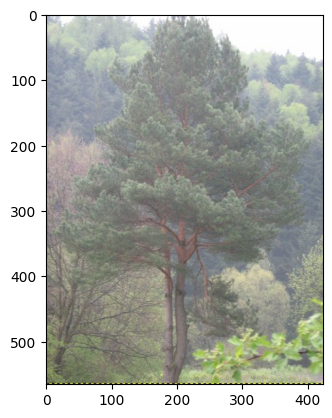

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread("./drzewo.png")
plt.imshow(img)

Rozmiar obrazka to: `... x ... x ... x`, co oznacza:  `wysokość/szerokość/liczba kanałów x wysokość/szerokość/liczba kanałów x wysokość/szerokość/liczba kanałów`

# Zadanie 2
Nasz obrazek ma 3 kanały. Każdy z nich odpowiada za jedną ze skaładowych. Korzystając z `subplot` z pakietu `matplotlib` wyrysuj każdą ze składowych oddzielnie.
Opcja: wybierz odpowiednią paletę barw do każdego z nich.

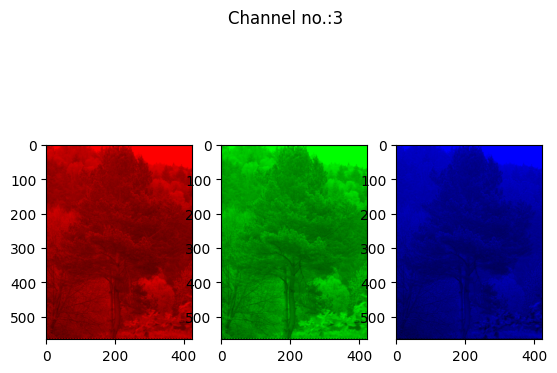

In [54]:
fig, axs = plt.subplots(ncols=3, nrows=1)
for i in range(3):
    fig.suptitle("Channel no.:" + str(i+1))
    tmp = np.zeros(img.shape)
    tmp[:,:,i] = img[:,:,i]
    axs[i].imshow(tmp)
plt.show()

## Zadanie 3

Napisz dwie funkcje, które pozwolą na przeniesienie kolorowego obrazka do sklai szarości. W pierwszej niech kazdy kolor będzie równie istotny, w drugiej proporcje niech wynoszą: $x = 0.299R + 0.587G + 0.114B$. Przetestuj na wcześniej wczytanym obrazku, wyświetl rezultaty i porównaj efekt. 

In [32]:
def toGrayEqual(img):
    r,g,b = img[:,:,0], img[:,:,1], img[:,:,2]
    return (r+g+b)/3    

In [47]:
def toGrayFormula(img):
    r,g,b = img[:,:,0], img[:,:,1], img[:,:,2]
    return 0.299*r + 0.587*g+ 0.114*b  

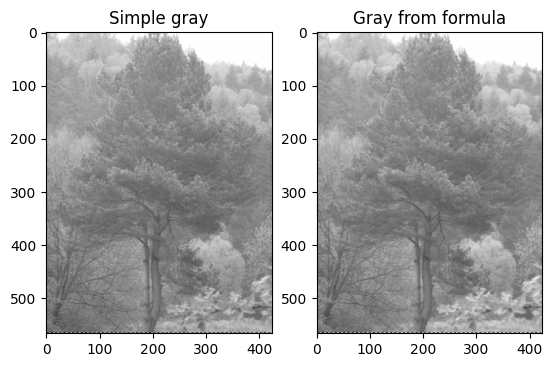

In [48]:
_, ax = plt.subplots(nrows=1, ncols=2)

gray = toGrayEqual(img)
grayFromFormula = toGrayFormula(img)

ax[0].title.set_text("Simple gray")
ax[0].imshow(gray, cmap='gray')

ax[1].title.set_text("Gray from formula")
ax[1].imshow(grayFromFormula, cmap='gray')

plt.show()

## Zadanie 4

Napisz funkcję, która pozwoli na normalizację przekazanego obrazka. Przetestuj ją na wczytanym obrazku oraz tym w skali szarości.

In [49]:
def normal(image):
    return image/255

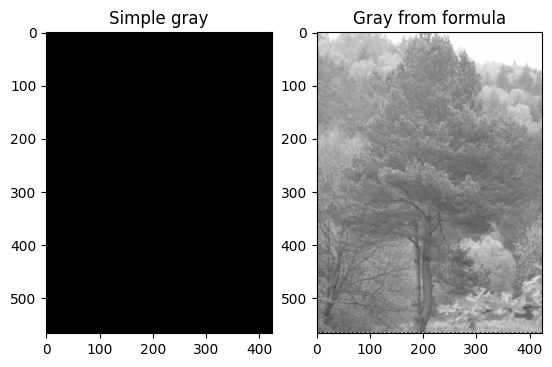

In [65]:
_, ax = plt.subplots(nrows=1, ncols=2)

gray = toGrayEqual(img)
grayFromFormula = toGrayFormula(img)

ax[0].title.set_text("Simple gray")
ax[0].imshow(normal(img), cmap='gray')
ax[1].title.set_text("Gray from formula")
ax[1].imshow(normal(grayFromFormula), cmap='gray')
plt.show()

## Zadanie 5
Narysuj histogram dla każdej z barw pierwotnie wczytanego obrazka. Czy rozkłady sa równomierne?

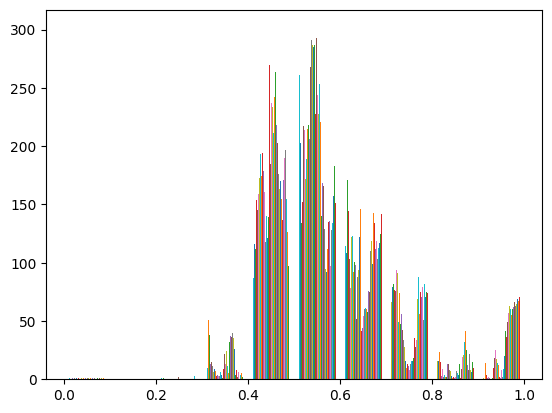

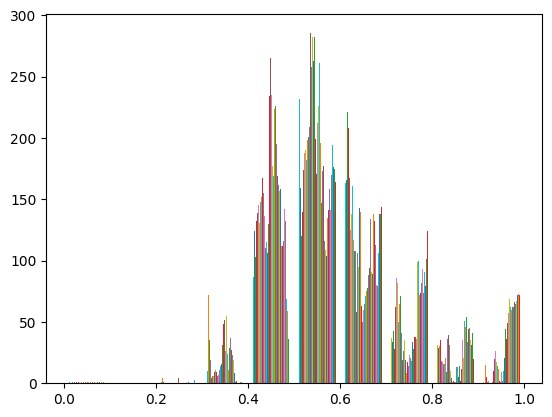

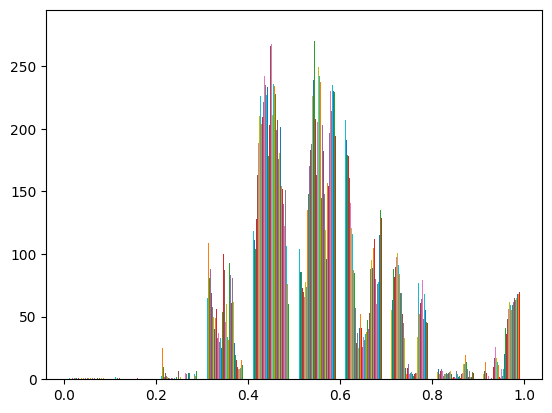

In [77]:
r,g,b = img[:,:,0], img[:,:,1], img[:,:,2]

plt.figure()
plt.hist(r)

plt.figure()
plt.hist(g)

plt.figure()
plt.hist(b)

plt.show()

## Zadanie 6 (`*`)
Sprawdź w jaki sposób wyrównać histogram. Przeanalizuj nowe wyglady histogramów. Kiedy ta operacja może być szczególnie potrzebna?


In [81]:
from skimage.exposure import equalize_hist
eq = equalize_hist(img)


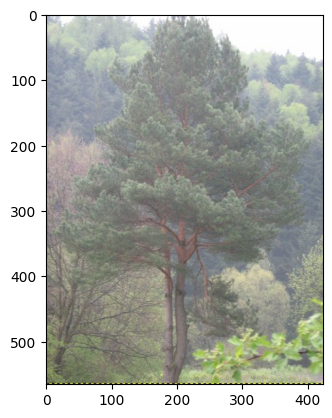

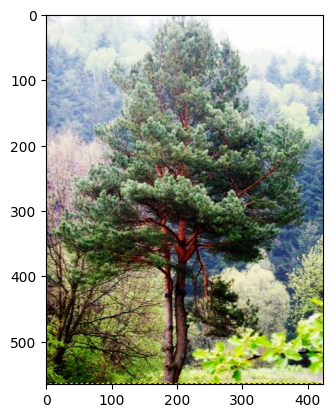

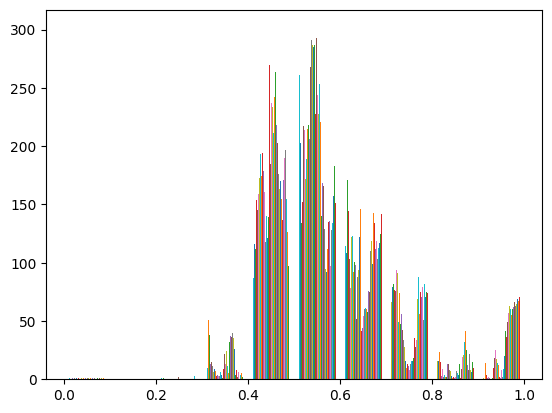

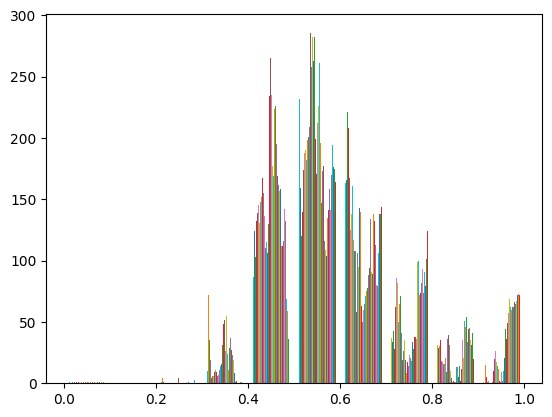

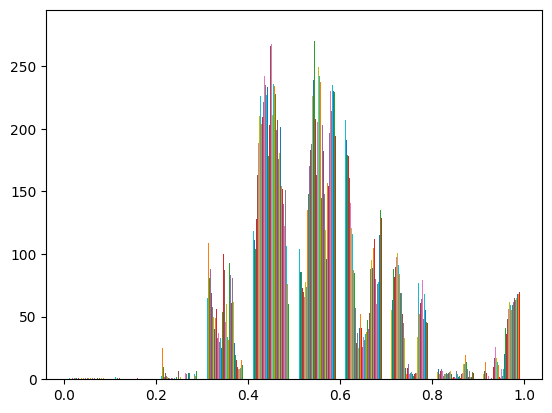

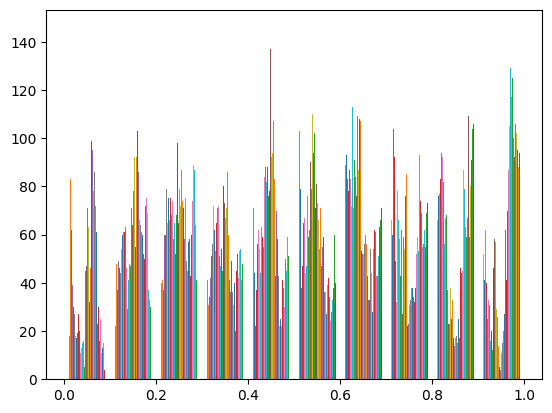

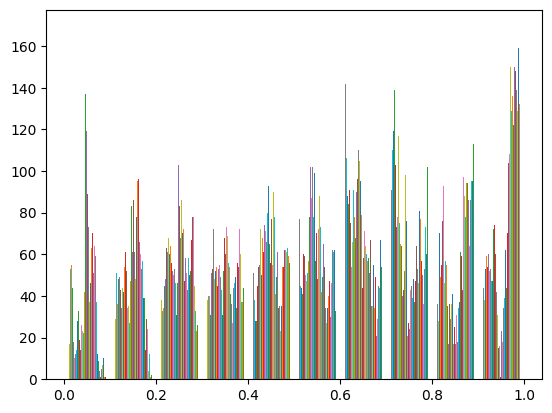

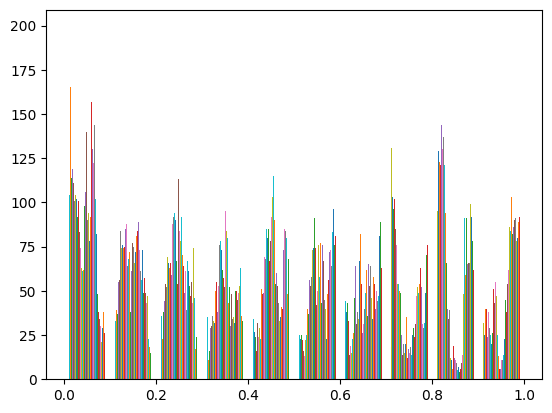

In [86]:
plt.figure()
plt.imshow(img)

plt.figure()
plt.imshow(eq)

plt.show()



r,g,b = img[:,:,0], img[:,:,1], img[:,:,2]

plt.figure()
plt.hist(r)

plt.figure()
plt.hist(g)

plt.figure()
plt.hist(b)



r,g,b = eq[:,:,0], eq[:,:,1], eq[:,:,2]

plt.figure()
plt.hist(r)

plt.figure()
plt.hist(g)

plt.figure()
plt.hist(b)

plt.show()

## Zadanie 7
Za pomocą metody `rotate` z `scipy.ndimage` obróć obrazek. Sprawdź dokumentację, co będzie efektem działania? (Oryginany zmieniony obrazek, kopia obrazka, czy zostanie coś zwrócone)

In [ ]:
import scipy.ndimage as ndimage






# Zadanie 8
Wejście do sieci MLP jest jednowymiarowe, wobec czego musimy "spłaszczyć" nasz obrazek. Napisz funkcję która zwróci zwektoryzowany obrazek. Przetestuj czy działa poprawnie.

## Zadanie 9
Zapoznaj się z informacjami o bazie danych `CIFAR-10`.

[Click! CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

Ściągnij bazę danych (wesja Python) a następnie ją wczytaj zgodnie z instrukcją na stronie (korzystamy z wersji dla python3)

# Zadanie 10
Wyświetl nazwy etykiet danych zapisanych w `label_names`. Wyświetl zbiór wartości etykiet zapisanych w `labels`. 
Następnie stwórz słownik konwersji nazw na numery etykiet, oraz numerów etykiet na nazwy.

# Zadanie 11
Wyświetl po jednym rysunku dla każdej klasy w tytule dopisując nazwę klasy. Następnie wyświetl wszystkie obrazki na jednym rysunku (wykorzystaj `subplot`).

## Zadanie 12

Dokonaj preprocesingu obrazów zawartych w bazie wykorzystując poprzednio napisane funkcje. Całość zamknij w funkcji `preprocessing_images`.  

## Zadanie 13

Napisz metodę, która zamieni standardowe wartości etykiet na tzw. "one-hot".
Przykład dla 3 klas:

```Etykieta    kodowanie```

        0      1 0 0
        
        1      0 1 0
        
        2      0 0 1 

---